# <div style="display:fill;border-radius:5px;background-color:#676F9F;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#F1EFF5;overflow:hidden;margin:0;font-size:150%;font-style: Helvetica;text-align:center"><b></b>WHAT IF DOCTOR🧑‍⚕️ PREPARES AN AI MODEL??🤔</p></div>

In the previous notebook, we have explored the dataset and now we are ready to prepare an AI model out of it. 
<b><u><i>"THE_FUEL_IS_READY_AND_HENCE_LETS_MAKE_AN_ENGINE...."<i/><u/><b/>

# <div style="display:fill;border-radius:5px;background-color:#676F9F;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#F1EFF5;overflow:hidden;margin:0;font-size:110%;text-align:center"><b></b>HEART_DISEASE_SEVERITY_PREDICTION_PROJECT</p></div>

In [1]:
import pandas as pd                       # library for data manipulation (data cleaning,analysing...)
import numpy as np                        # library for numerical computation
import matplotlib.pyplot as plt           # library for data visualization which is built on NumPy arrays
%matplotlib inline
import seaborn as sns                     # library for data visualization built on top of matplotlib and 
                                          # closely integrated with pandas data structures in Python.
    
import pandas_profiling                   # library to generate a basic report on the input DataFrame


import warnings                           # to avoid warning flash
warnings.filterwarnings('ignore')

# Other libraries will be imported in the following steps as the process moves.... 

In [2]:
#Import data
col = ['Age', 'Sex', 'Chest_Pain_Type', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope','colored_by_F','Thalassemia','HeartDisease']
df = pd.read_excel('Ch3.ClevelandData.xlsx', names=col)

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df

,Age,Sex,Chest_Pain_Type,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,colored_by_F,Thalassemia,HeartDisease
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
5,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
6,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
7,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
8,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
9,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              302 non-null    int64  
 1   Sex              302 non-null    int64  
 2   Chest_Pain_Type  302 non-null    int64  
 3   RestingBP        302 non-null    int64  
 4   Cholesterol      302 non-null    int64  
 5   FastingBS        302 non-null    int64  
 6   RestingECG       302 non-null    int64  
 7   MaxHR            302 non-null    int64  
 8   ExerciseAngina   302 non-null    int64  
 9   Oldpeak          302 non-null    float64
 10  ST_Slope         302 non-null    int64  
 11  colored_by_F     302 non-null    object 
 12  Thalassemia      302 non-null    object 
 13  HeartDisease     302 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.2+ KB


In [6]:
df.shape

(302, 14)

## <font color='#4287f5'>MODELLING_THE_AI...</font>

Before modelling,lets convert our dataset in the desirable form as we did in the previous notebook.....

In [7]:
AI = df.copy()

In [8]:
rows_1 = AI[AI['HeartDisease'] == 1].index     # --- >50% narrowing....(as per dataset info)

AI.loc[rows_1,'HeartDisease'] = 5              # 5 --> SEVERE

# Lets consider the individuals who have resting ECG as well as exercise ECG showing abnormalities, to be having.....
# ......moderate degree of heart diseaase 

MOD1 = AI[(AI['RestingECG'] == 2) & (AI['ST_Slope'] == 1) &  (AI.HeartDisease == 0)].index.tolist()
MOD2 = AI[(AI['RestingECG'] == 2) & (AI['ST_Slope'] == 3) &  (AI.HeartDisease == 0)].index.tolist()

rows_2 = MOD1 + MOD2
AI.loc[rows_2,'HeartDisease'] = 4              # 4 ---> MODERATE

# Lets now name those individuals who have resting ECG showing abnormality but a normal exercise ECG, to be having .....
# .....mild degree of heart disease.

rows_3 = AI[(AI['RestingECG'] == 2) & (AI['ST_Slope'] == 2) &  (AI.HeartDisease == 0)].index.tolist()

AI.loc[rows_3,'HeartDisease'] = 3              # 3 ---> MILD

# Those people who have normal resting ECG but shows abnormality on exercise, should be closely monitored if possible...
# ...So,lets name these people to be having high risk individuals...

HRI1 = AI[(AI['RestingECG'] == 0) & (AI['ST_Slope'] == 1) &  (AI.HeartDisease == 0)].value_counts().sum()
HRI2 = AI[(AI['RestingECG'] == 0) & (AI['ST_Slope'] == 3) &  (AI.HeartDisease == 0)].value_counts().sum()
HRI = HRI1 + HRI2
print('The number of high risk individuals found to be ', HRI, "in number.")

# Lets change the target column...

HRI_1 = AI[(AI['RestingECG'] == 0) & (AI['ST_Slope'] == 1) &  (AI.HeartDisease == 0)].index.tolist()
HRI_2 = AI[(AI['RestingECG'] == 0) & (AI['ST_Slope'] == 3) &  (AI.HeartDisease == 0)].index.tolist()
rows_4 = HRI_1 + HRI_2

AI.loc[rows_4,'HeartDisease'] = 2               # 2 ---> HRI

# The remaining individuals are healthy people...lets get their numbers...

print('The total number of healthy people found to be',
      AI[(AI['RestingECG'] == 0) & (AI['ExerciseAngina'] == 0) & (AI['ST_Slope'] == 2) & (AI.HeartDisease == 0)].value_counts().sum(),
      'in number.')

# Lets change the target column...

rows_5 = AI[(AI['RestingECG'] == 0) & (AI['ExerciseAngina'] == 0) & (AI['ST_Slope'] == 2) & (AI.HeartDisease == 0)].index.tolist()

AI.loc[rows_5,'HeartDisease'] = 1                # 1 ---> HEALTHY

who = AI[AI.HeartDisease == 0]

drop_these = AI[AI.HeartDisease == 0].index.tolist()
AI.drop(drop_these,axis=0,inplace=True)


The number of high risk individuals found to be  72 in number.
The total number of healthy people found to be 19 in number.


In [9]:
drop_columns = ['colored_by_F','Thalassemia']

AI.drop(drop_columns,axis=1,inplace=True)

In [10]:
Angiographic_status = df['HeartDisease'].copy()

In [11]:
AI.insert(11,'Angiographic_status',True)
AI['Angiographic_status'] = Angiographic_status

In [12]:
AI

,Age,Sex,Chest_Pain_Type,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Angiographic_status,HeartDisease
0,67,1,4,160,286,0,2,108,1,1.5,2,1,5
1,67,1,4,120,229,0,2,129,1,2.6,2,1,5
2,37,1,3,130,250,0,0,187,0,3.5,3,0,2
3,41,0,2,130,204,0,2,172,0,1.4,1,0,4
4,56,1,2,120,236,0,0,178,0,0.8,1,0,2
5,62,0,4,140,268,0,2,160,0,3.6,3,1,5
6,57,0,4,120,354,0,0,163,1,0.6,1,0,2
7,63,1,4,130,254,0,2,147,0,1.4,2,1,5
8,53,1,4,140,203,1,2,155,1,3.1,3,1,5
9,57,1,4,140,192,0,0,148,0,0.4,2,0,1


## <font color='#4287f5'> TRAIN/TEST DATA PREPARATION....</font>

Before preparing train and test data,

### <font color='#4287f5'> Lets see the correlated features in our dataset...</font>

For that, lets plot <u>**Pearson's Correlation Coefficient**</u>....
<br></br>
What does this coefficient signify?
* It is a measure of the strength of a linear association between two variables.
* It gives the measure of the strength of association between two variables.
* It takes a range of values from +1 to -1.
* A **value of 0** indicates that there is **no association** between the two variables. 
* A **value greater than 0** indicates a **positive association**; that is, as the value of one variable increases, so does the value of the other variable. 
* A **value less than 0** indicates a **negative association**; that is, as the value of one variable increases, the value of the other variable decreases.

<AxesSubplot:>

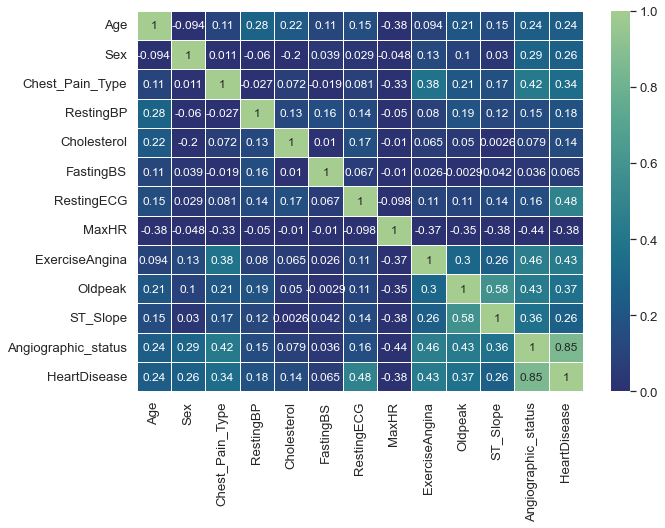

In [37]:
corr_matrix=AI.corr()

plt.figure(figsize=(10,7))       # Size of whole plot

sns.set(font_scale= 1.2)         # Font size of labels 

sns.heatmap(corr_matrix, annot=True, cmap='crest_r',vmin=0, vmax=1, linewidths=.5, annot_kws={"size": 12})

Here we can see that,
* Angiographic_status(0.85), RestingECG(0.48), ExerciseAngina(0.43),Oldpeak(0.37) are the first four features which are most correlated(high p-values) with target variable 'HeartDisease'.

We can rank these features by another method named **'F-test'**.

* The F Test Formula is a Statistical Formula used to test the significance of differences between two groups of Data. It is often used in research studies to determine whether the difference in the means of two populations is Statistically significant.
                                        OR
* F test is a statistical test that is used in hypothesis testing to check whether the variances of two populations or two samples are equal or not
* In simple terms, lets say F-test value of a feature 'Glucose' is 0.5, it means that the model uses 0.5 amount of a feature value in determining its prediction.

In [14]:
target_name='HeartDisease'

y= AI[target_name]

X=AI.drop(target_name,axis=1) 

In [15]:
from sklearn.feature_selection import f_classif

[f_stat, f_p_value] = f_classif(X,y)

f_test_AI = pd.DataFrame({'Feature': AI.columns[:12] , 
                          'f_statistic': f_stat,
                          'p value':f_p_value})

f_test_AI.sort_values('p value')

,Feature,f_statistic,p value
11,Angiographic_status,inf,0.000000e+00
6,RestingECG,89.768333,1.167338e-49
10,ST_Slope,38.210010,1.040135e-25
8,ExerciseAngina,20.218259,1.028233e-14
7,MaxHR,20.082239,1.266057e-14
9,Oldpeak,18.292693,2.005721e-13
2,Chest_Pain_Type,15.998015,7.428312e-12
1,Sex,7.988190,4.009655e-06
0,Age,5.871967,1.475245e-04
3,RestingBP,2.739263,2.898990e-02


As we can see here, as mentioned earlier,
* Angiographic_status, RestingECG, ST_Slope, ExerciseAngina, MaxHR, Oldpeak are most correlated features.

I am aspiring to build such an AI which selects the above ranked features in its prediction.

## <font color='#4287f5'>Split the Data Frame into X and y...</font>

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


# Classification Algorithms

- Naive Bayes
- KNN
- SVM
- Decision Tree
- Random Forest
- Logistic Regression

### The models include the following:-

#### a. Hyper Parameter Tuning using GridSearch CV

**1. What Is Hyperparameter Tuning?**

Hyperparameters are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Random Forest Algorithms, k in KNN Classifier.
Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. 

**2. What is GridSearch ?**

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

**3. What Steps To Follow For Hyper Parameter Tuning?**

1. Select the type of model we want to use like RandomForestClassifier, regressor or any other model
2. Check what are the parameters of the model
3. Select the methods for searching the hyperparameter
4. Select the cross-validation approach
5. Evaluate the model using the score

#### b. Fit Best Model

#### c. Predict on testing data using that model

#### d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score
**Confusion Matrix**
It is a tabular visualization of the model predictions versus the ground-truth labels. 

**F1 Score :-**
It’s the harmonic mean between precision and recall. 

**Precision Score**
Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.

**Recall Score**
It is the fraction of positives/negative events that you predicted correctly. 

In [17]:
##################################################################################################################
####################################         IMPORT_DIFFERENT_MODELS_CLASS     ###################################
##################################################################################################################

from sklearn.linear_model      import LogisticRegression

from sklearn.neighbors         import KNeighborsClassifier

from sklearn.naive_bayes       import GaussianNB

from sklearn.svm               import SVC

from sklearn.tree              import DecisionTreeClassifier
from sklearn.ensemble          import RandomForestClassifier

from keras.models              import Sequential
from keras.layers              import Dense


##################################################################################################################
####################################         IMPORT_MODEL_SELECTION_CLASS    #####################################
##################################################################################################################



from sklearn.model_selection   import RepeatedStratifiedKFold
from sklearn.model_selection   import GridSearchCV


##################################################################################################################
####################################         IMPORT_STATISTICS_METHODS    ########################################
##################################################################################################################


from sklearn.metrics           import classification_report,confusion_matrix
from sklearn.metrics           import f1_score, precision_score, recall_score

Best leaf_size: 30
Best p: 1
Best n_neighbors: 15
Classification Report is:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.31      0.29      0.30        14
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        10
           5       0.49      0.81      0.61        27

    accuracy                           0.43        60
   macro avg       0.16      0.22      0.18        60
weighted avg       0.29      0.43      0.34        60


 F1:
 0.34413580246913583

 Precision score is:
 0.29179487179487185

 Recall score is:
 0.43333333333333335

 Confusion Matrix:



<AxesSubplot:>

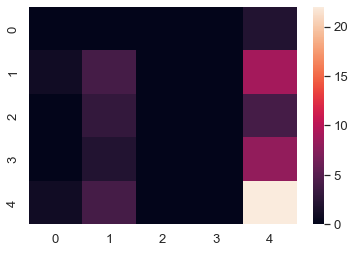

In [42]:
##################################################################################################################
#####################################    K-NEIGHBORS_CLASSIFIER_MODEL   ##########################################
##################################################################################################################


# from sklearn.neighbors  import KNeighborsClassifier

# List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

# Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Train the model
best_model = grid_search.fit(X_train,y_train)

# Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

# Test the model
knn_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred,average='weighted'))
print("\n Precision score is:\n",precision_score(y_test,knn_pred,average='weighted'))
print("\n Recall score is:\n",recall_score(y_test,knn_pred,average='weighted'))
print("\n Confusion Matrix:\n")

sns.heatmap(confusion_matrix(y_test,knn_pred))

VERY POOR RESULTS !!!!!! As expected because the feature values are not standardised/normalised, class imbalance is not rectified. In other words, the dataset is not fed to the above model in the form which it wanted....

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Classification Report is:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.60      0.43      0.50        14
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        10
           5       0.52      0.96      0.68        27

    accuracy                           0.53        60
   macro avg       0.22      0.28      0.24        60
weighted avg       0.37      0.53      0.42        60


 F1:
 0.4205627705627705

 Precision score is:
 0.374

 Recall score is:
 0.5333333333333333

 Confusion Matrix:



<AxesSubplot:>

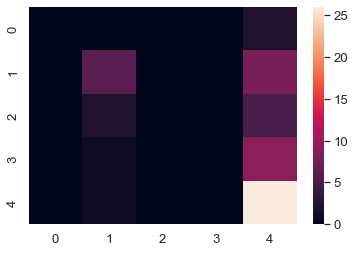

In [43]:
##################################################################################################################
############################    GAUSSIAN_NAIVE_BAYES_CLASSIFIER_MODEL   ##########################################
##################################################################################################################

# from sklearn.naive_bayes import GaussianNB

# List Hyperparameters to tune
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}

# Making the model
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

# Train the model
best_model= nbModel_grid.fit(X_train, y_train)

# Test the model
nb_pred=best_model.predict(X_test)

# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred,average='weighted'))
print("\n Precision score is:\n",precision_score(y_test,nb_pred,average='weighted'))
print("\n Recall score is:\n",recall_score(y_test,nb_pred,average='weighted'))
print("\n Confusion Matrix:\n")

sns.heatmap(confusion_matrix(y_test,nb_pred))

AGAIN VERY POOR RESULTS !!!!!! As expected because the feature values are not standardised/normalised, class imbalance is not rectified. In other words, the dataset is not fed to the above model in the form which it wanted....

Classification Report is:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.69      0.79      0.73        14
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00        10
           5       0.60      0.93      0.72        27

    accuracy                           0.62        60
   macro avg       0.46      0.37      0.34        60
weighted avg       0.54      0.62      0.53        60


 F1:
 0.34413580246913583

 Precision score is:
 0.29179487179487185

 Recall score is:
 0.43333333333333335

 Confusion Matrix:



<AxesSubplot:>

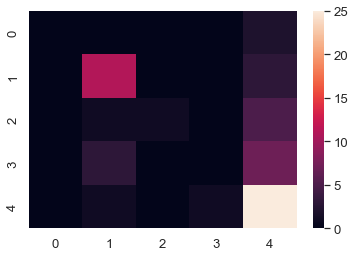

In [44]:
##################################################################################################################
######################################   SUPPORT_VECTOR_MACHINE_MODEL   ##########################################
##################################################################################################################

# from sklearn.svm import SVC

# List Hyperparameters to tune
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Train the model
grid_result = grid_search.fit(X, y)

# Test the model
svm_pred=grid_result.predict(X_test)

# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred,average='weighted'))
print("\n Precision score is:\n",precision_score(y_test,knn_pred,average='weighted'))
print("\n Recall score is:\n",recall_score(y_test,knn_pred,average='weighted'))
print("\n Confusion Matrix:\n")

sns.heatmap(confusion_matrix(y_test,svm_pred))

YET AGAIN VERY POOR RESULTS !!!!!! As expected because the feature values are not standardised/normalised, class imbalance is not rectified. In other words, the dataset is not fed to the above model in the form which it wanted....

Fitting 4 folds for each of 40 candidates, totalling 160 fits
Classification Report is:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        27

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


 F1:
 1.0

 Precision score is:
 1.0

 Recall score is:
 1.0

 Confusion Matrix:



<AxesSubplot:>

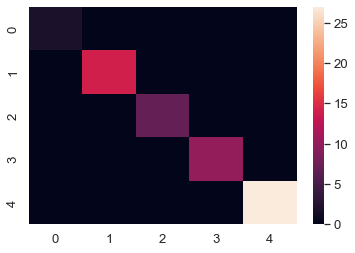

In [38]:
##################################################################################################################
#####################################  DECISION_TREE_CLASSIFIER_MODEL   ##########################################
##################################################################################################################

# from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

dt = DecisionTreeClassifier()
# Making the model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

# Train the model
best_model=grid_search.fit(X_train, y_train)

# Test the model
dt_pred=best_model.predict(X_test)

# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred,average='weighted'))
print("\n Precision score is:\n",precision_score(y_test,dt_pred,average='weighted'))
print("\n Recall score is:\n",recall_score(y_test,dt_pred,average='weighted'))
print("\n Confusion Matrix:\n")

sns.heatmap(confusion_matrix(y_test,dt_pred))


Here comes the brand !!! As expected, tree based algorithms will do well in the tasks like these...

No handles with labels found to put in legend.


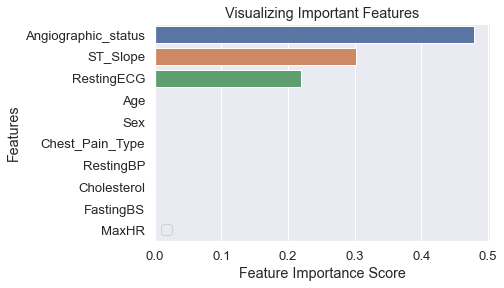

In [39]:
#Lets see the top features which has been selected by decision tree to classify
dt_model = DecisionTreeClassifier(random_state=0)
y_pred = dt_model.fit(X_train, y_train).predict(X_test)


# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, dt_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[0:10]

feature_importance

import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [23]:
############################# AdaBoostClassifier ########################

In [24]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=0)
ada_model.fit(X_train,y_train)

y_pred = ada_model.predict(X_test)

# Metrics Performance
print(classification_report(y_test,y_pred))

# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, ada_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[0:10]

import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

No handles with labels found to put in legend.


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.88      1.00      0.93        14
           3       0.00      0.00      0.00         7
           4       0.59      1.00      0.74        10
           5       1.00      1.00      1.00        27

    accuracy                           0.85        60
   macro avg       0.49      0.60      0.53        60
weighted avg       0.75      0.85      0.79        60



Classification Report is:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        27

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


 F1:
 1.0

 Precision score is:
 1.0

 Recall score is:
 1.0

 Confusion Matrix:



<AxesSubplot:>

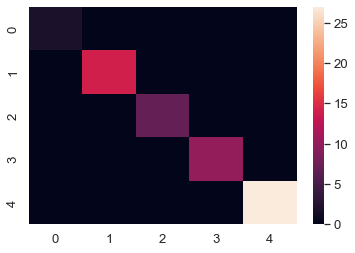

In [40]:
##################################################################################################################
#####################################  RANDOM_FOREST_CLASSIFIER_MODEL   ##########################################
##################################################################################################################

# from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

# Making the model
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# Train the model
best_model = grid_search.fit(X_train, y_train)

# Test the model
rf_pred=best_model.predict(X_test)

# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,rf_pred,average='weighted'))
print("\n Precision score is:\n",precision_score(y_test,rf_pred,average='weighted'))
print("\n Recall score is:\n",recall_score(y_test,rf_pred,average='weighted'))
print("\n Confusion Matrix:\n")

sns.heatmap(confusion_matrix(y_test,rf_pred))

No handles with labels found to put in legend.


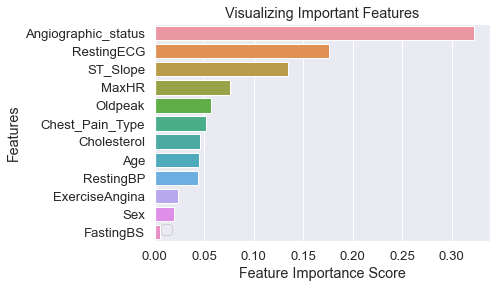

In [41]:
# #Lets see the top features which has been selected by random forest to classify
rf_model = RandomForestClassifier(random_state=1)
y_pred = rf_model.fit(X_train, y_train).predict(X_test)

# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, rf_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[0:15]

import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Similar results like that of decision trees....

For Fold 1 the accuracy is 1.0
For Fold 2 the accuracy is 0.9666666666666667
For Fold 3 the accuracy is 0.9666666666666667
For Fold 4 the accuracy is 0.9333333333333333
For Fold 5 the accuracy is 0.9333333333333333
For Fold 6 the accuracy is 0.9666666666666667
For Fold 7 the accuracy is 1.0
For Fold 8 the accuracy is 1.0
For Fold 9 the accuracy is 1.0
For Fold 10 the accuracy is 1.0

RandomForestClassifier Mean Accuracy =  0.9766666666666666


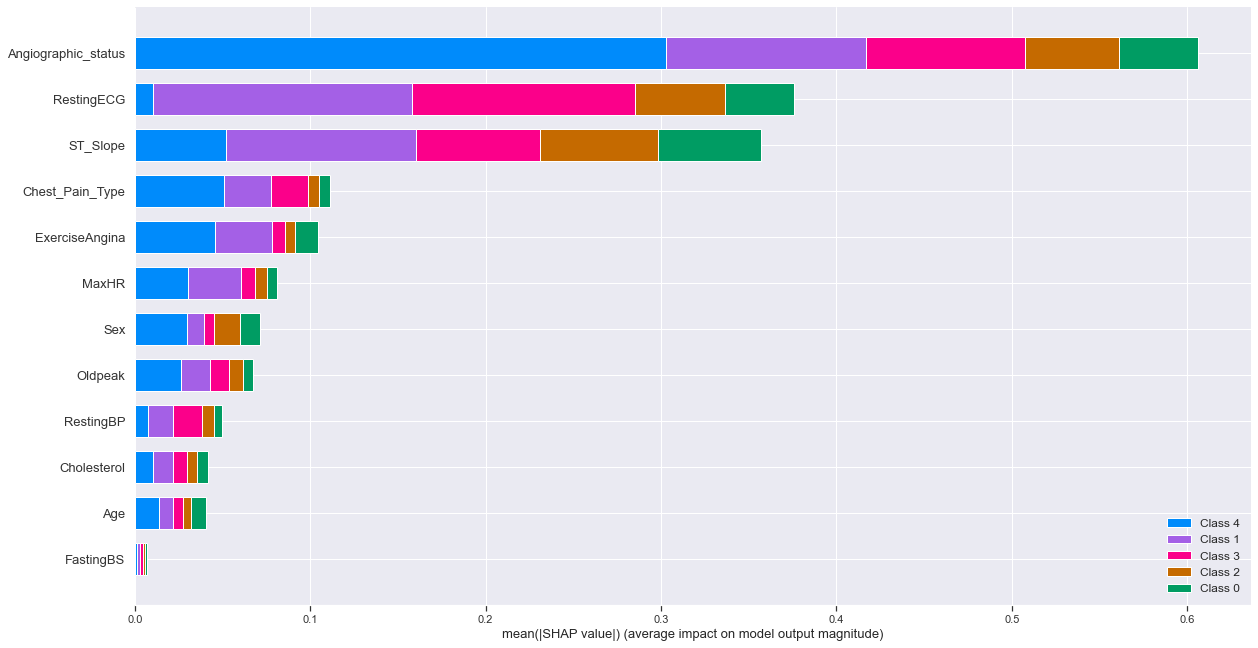

In [50]:
import shap
from sklearn.ensemble import RandomForestClassifier         # using random forest to explain for ease
from sklearn.model_selection import StratifiedKFold

rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  rfc.fit(X_train, y_train)
  score = rfc.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))
    
fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('RandomForestClassifier Mean Accuracy = ', np.mean(acc))


rfc.fit(train, y.iloc[train_index])

explainer = shap.TreeExplainer(rfc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(test)
shap.summary_plot(shap_values, train, plot_size=(20,11), alpha=0.2, plot_type='bar') 

In [27]:
# xg Boost
from xgboost import XGBClassifier


In [28]:
xg_model = XGBClassifier(random_state=1)
xg_model.fit(X_train, y_train)

[12:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [29]:
y_pred = xg_model.predict(X_test)

In [30]:
from sklearn import metrics
metrics.f1_score(y_test,y_pred,average="weighted")

1.0

In [31]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        27

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [32]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, xg_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[0:10]

No handles with labels found to put in legend.


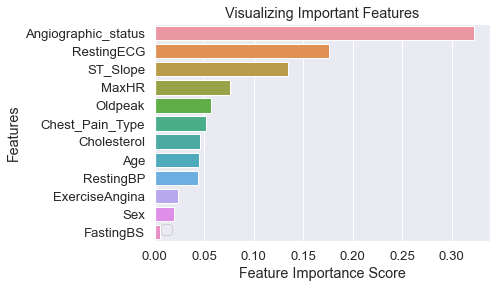

In [51]:
import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Yet again, nice results with well selected features....

Classification Report is:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.75      0.86      0.80        14
           3       0.50      0.14      0.22         7
           4       0.69      0.90      0.78        10
           5       0.82      0.85      0.84        27

    accuracy                           0.75        60
   macro avg       0.55      0.55      0.53        60
weighted avg       0.72      0.75      0.72        60


 F1:
 0.7193910115649246

 Precision score is:
 0.7183608058608059

 Recall score is:
 0.75

 Confusion Matrix:



<AxesSubplot:>

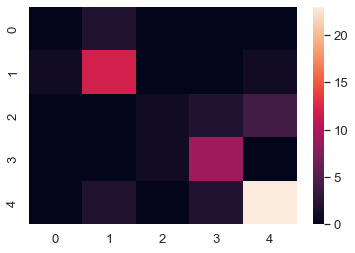

In [46]:
##################################################################################################################
########################################  LOGISTIC_REGRESSION_MODEL   ############################################
##################################################################################################################

# from sklearn.linear_model import LogisticRegression

# Fit and train the model
reg = LogisticRegression()
reg.fit(X_train,y_train)

# Test the model
lr_pred=reg.predict(X_test)

# Evaluate the model
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred,average = 'weighted'))
print("\n Precision score is:\n",precision_score(y_test,lr_pred,average = 'weighted'))
print("\n Recall score is:\n",recall_score(y_test,lr_pred,average = 'weighted'))
print("\n Confusion Matrix:\n")
                    
sns.heatmap(confusion_matrix(y_test,lr_pred))

Not good at all ........

Tree Based Algorithms had performed well at their core best.....

## THANK YOU...